In [138]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, classification_report, precision_score, mean_squared_error, accuracy_score
from sklearn import preprocessing
from sklearn import neighbors

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use("seaborn-v0_8") 

In [105]:
# Problem 2 Use logistic regression to predict the probability of default using income and balance. 
#Estimate the test error using

In [106]:
df = pd.read_csv('Default.csv', index_col = 0)

In [145]:
X_ = df[['balance', 'income', 'student2']]
y = df['default2']


In [107]:
# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head()

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.62507,0,0
2,No,Yes,817.180407,12106.13470,0,1
3,No,No,1073.549164,31767.13895,0,0
4,No,No,529.250605,35704.49394,0,0
5,No,No,785.655883,38463.49588,0,0


In [108]:
# LOGISTICAL REGRESSION
#establish y output:
y = df.default2

# Assert x train input
X_train = df.balance.values.reshape(-1,1)

# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
clf = skl_lm.LogisticRegression(solver='newton-cg')

#fit the output
clf.fit(X_train,y)

print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)


LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.00546217]]
intercept : [-10.59003277]


In [109]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   default   10000 non-null  object 
 1   student   10000 non-null  object 
 2   balance   10000 non-null  float64
 3   income    10000 non-null  float64
 4   default2  10000 non-null  int64  
 5   student2  10000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 546.9+ KB


In [110]:
# MULITPLE LOGISTICAL REGRESSION

X_train = sm.add_constant(df[['balance', 'income']])

est = smf.logit("default2 ~ balance + income", data = df).fit()

est.summary2().tables[1]

y_pred_prob = est.predict(X_train)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\Baron\Desktop\EE_257_Repo\EE_257\%ML_PATH_EE257%\EE257_env\Lib\site-packages\sklearn\utils\optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


Accuracy: 0.9695


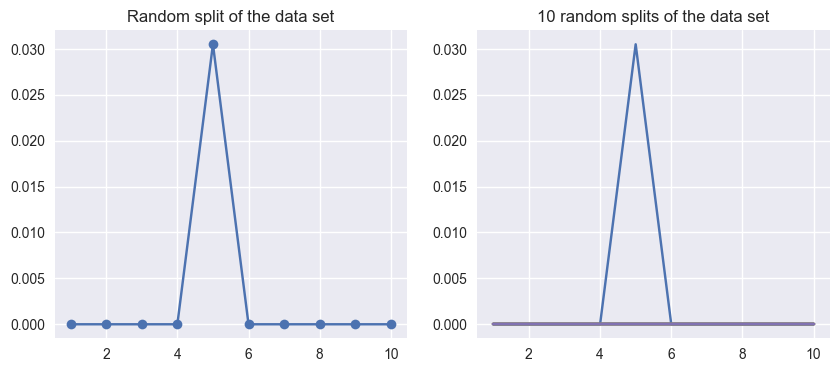

In [149]:
# Cross Validation: Validation Set Approach

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

clf = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Z[i,j]= mean_squared_error(y_test, pred)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

#for ax in fig.axes:
#    ax.set_ylabel('Mean Squared Error')
#    ax.set_ylim(15,30)
#    ax.set_xlabel('Degree of Polynomial')
#    ax.set_xlim(0.5,10.5)
#    ax.set_xticks(range(2,11,2));
#
#accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)